
# Project: Investigate a Dataset: Correlation of life expectancy to democracy score

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Dataset**:
The data used was retrieved from Gapminder, a database with information about lives of people in different countries, tracked across the years, and on a number of different indicators.
Four different datasets are the basis of this report: 
1. The democracy score of different countries
2. Income per person in different countries
3. The life expectancy of women in different countries
4. The life expectancy of men in different countries

**Questions**:
Subject of this report is an investigation of a possible correlation in life expectency (male/female) and average income to level of democracy. Does democracy have some kind of direct or indirect effect on life expactency of its inhabitants or income? Can this correlation be proven consistently in all countries, which are part of the database. If there is a correlation, does this correlation apply to males and females equally? 

In [531]:
# Import all necessary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangle'></a>
## Data Wrangling

In this section of the report, data is loaded in and datasets are trimmed and cleaned in preparation for the dataset analysis.

### General Properties

In [532]:
# Import Data of Democracy Score
df_DS = pd.read_csv('A/democracy_score_use_as_color.csv')

In [533]:
# Checking data type
df_DS.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
Length: 213, dtype: object

In [534]:
# Inspecting values
df_DS.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [535]:
# Import Data of income per person
df_GDP = pd.read_csv('A/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [536]:
# Checking Datatypes
df_GDP.dtypes

country    object
1800        int64
1801        int64
1802        int64
1803        int64
            ...  
2036        int64
2037        int64
2038        int64
2039        int64
2040        int64
Length: 242, dtype: object

In [537]:
# Inspecting values
df_GDP.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [538]:
# Import Data of life expectancy female
df_LEF = pd.read_csv('A/life_expectancy_female.csv')

In [539]:
# Inspecting values
df_LEF.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.4,28.6,29.2,29.7,30.2,30.7,31.2,31.7,32.2,...,79.1,79.2,79.4,79.5,79.6,79.7,79.9,80.0,80.1,80.2
1,Albania,55.2,55.3,55.7,56.3,56.9,57.7,58.7,59.8,60.9,...,89.9,90.0,90.1,90.2,90.3,90.5,90.6,90.7,90.8,90.9
2,Algeria,42.7,42.9,43.3,43.7,44.2,44.6,45.0,45.5,45.9,...,88.4,88.5,88.6,88.7,88.8,89.0,89.1,89.2,89.3,89.4
3,Angola,32.4,32.5,32.7,32.9,33.1,33.3,33.6,33.8,34.1,...,78.0,78.1,78.2,78.3,78.5,78.6,78.7,78.8,78.9,79.0
4,Antigua and Barbuda,59.8,60.0,60.5,61.0,61.5,61.9,62.4,62.9,63.3,...,87.9,88.0,88.2,88.3,88.4,88.5,88.6,88.7,88.8,88.9


In [540]:
# Import Data of life expectancy female
df_LEM = pd.read_csv('A/life_expectancy_male.csv')

In [541]:
# Inspecting values
df_LEM.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,26.9,27.1,27.7,28.2,28.7,29.2,29.7,30.2,30.7,...,74.2,74.4,74.5,74.7,74.8,75.0,75.1,75.3,75.4,75.6
1,Albania,53.2,53.4,54.0,54.7,55.4,56.2,57.2,58.2,59.2,...,87.9,88.0,88.1,88.2,88.3,88.4,88.5,88.6,88.7,88.8
2,Algeria,41.5,41.7,42.1,42.5,42.9,43.3,43.7,44.1,44.6,...,87.0,87.2,87.3,87.4,87.5,87.6,87.7,87.8,87.9,88.0
3,Angola,29.7,29.7,29.9,30.1,30.3,30.5,30.7,31.0,31.2,...,70.9,71.0,71.2,71.3,71.5,71.6,71.7,71.9,72.0,72.2
4,Antigua and Barbuda,55.0,55.2,55.8,56.3,56.8,57.3,57.8,58.2,58.7,...,85.7,85.8,85.9,86.0,86.1,86.2,86.4,86.5,86.6,86.7


The investigation of the four datasets shows that the column "country" can be used as primery key for merging all datasets, if needed. Furthermore, of all columns only the years 1950-2011 are available in all datasets. Therefore columns representing years, which are not available in all datasets will be ignored. Countries for which one or more datasets have not values for each year (1950-2011), will be ignored as well. Besides the primary key "country" of datatype string, the datasets for life expectancey and democracy score contain values of type floeat. For convenience the values in the dataset of income per person will be converter to float as well. 

### Data Cleaning (Replace this with more specific notes!)

In [542]:
# Dropping columns for which there is no data in life expectancy (probably not necessary if inner merge)
df_DS = df_DS[ ['country'] + list(df_DS.loc[:, '1950':'2011']) ]

In [543]:
# Deleting rows (=Countries) with missing data
df_DS = df_DS.dropna()

In [544]:
df_DS = df_DS.rename(columns={"country": "year"})

In [545]:
#Changing the index to country name
df_DS = df_DS.set_index('year')

In [546]:
#Transposing data as preparation for merge
df_DS = df_DS.transpose()

In [547]:
# Inspecting values
df_DS.tail()

year,Argentina,Australia,Austria,Belgium,Bhutan,Bolivia,Brazil,Bulgaria,Canada,Chile,...,Spain,Sri Lanka,Sweden,Switzerland,Syria,Thailand,Turkey,United Kingdom,United States,Venezuela
2007,8.0,10.0,10.0,8.0,-6.0,8.0,8.0,9.0,10.0,10.0,...,10.0,6.0,10.0,10.0,-7.0,-1.0,7.0,10.0,10.0,5.0
2008,8.0,10.0,10.0,8.0,3.0,8.0,8.0,9.0,10.0,10.0,...,10.0,6.0,10.0,10.0,-7.0,4.0,7.0,10.0,10.0,5.0
2009,8.0,10.0,10.0,8.0,3.0,7.0,8.0,9.0,10.0,10.0,...,10.0,6.0,10.0,10.0,-7.0,4.0,7.0,10.0,10.0,-3.0
2010,8.0,10.0,10.0,8.0,3.0,7.0,8.0,9.0,10.0,10.0,...,10.0,4.0,10.0,10.0,-7.0,4.0,7.0,10.0,10.0,-3.0
2011,8.0,10.0,10.0,8.0,3.0,7.0,8.0,9.0,10.0,10.0,...,10.0,4.0,10.0,10.0,-7.0,7.0,9.0,10.0,10.0,-3.0


In [548]:
# Dropping columns for which there is no data in life expectancy (probably not necessary if inner merge)
df_GDP = df_GDP[ ['country'] + list(df_GDP.loc[:, '1950':'2011']) ]

In [549]:
# Deleting rows (=Countries) with missing data
df_GDP = df_GDP.dropna()

In [550]:
# Renaming the column country to year, for tansposing
df_GDP = df_GDP.rename(columns={"country": "year"})

In [551]:
#Changing the index to country name
df_GDP = df_GDP.set_index('year')

In [552]:
#Transposing data as preparation for merge
df_GDP = df_GDP.transpose()

In [553]:
#Converting the values of type integer to type float
#df_GDP = df_GDP.loc[:, '1950':'2011'].astype('float')

In [554]:
df_GDP.dtypes

year
Afghanistan    int64
Albania        int64
Algeria        int64
Andorra        int64
Angola         int64
               ...  
Venezuela      int64
Vietnam        int64
Yemen          int64
Zambia         int64
Zimbabwe       int64
Length: 193, dtype: object

In [555]:
# Inspecting values
df_GDP.tail()

year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
2007,1290,8450,12600,43400,5440,24200,17900,7010,40700,43700,...,38200,51000,14300,3530,2830,17300,3910,4190,2750,1490
2008,1300,9150,12700,41400,5980,24000,18400,7560,41300,44300,...,37700,50400,15300,3780,2940,17900,4090,4230,2880,1210
2009,1530,9530,12600,41700,5910,20800,17200,6530,41200,42500,...,35800,48600,15900,4020,2970,17100,4260,4270,3060,1290
2010,1610,9930,12900,39000,5900,19100,18700,6700,41400,43200,...,36200,49400,17100,4240,2950,16500,4490,4480,3280,1460
2011,1660,10200,13000,42000,5910,18600,19600,7020,41800,44200,...,36500,49800,17900,4470,2920,17000,4720,3810,3360,1660


In [556]:
# Dropping columns for which there is no data in democracy score (probably not necessary if inner merge)
df_LEF = df_LEF[ ['country'] + list(df_LEF.loc[:, '1950':'2011']) ]

In [557]:
# Deleting rows (=Countries) with missing data
df_LEF = df_LEF.dropna()

In [558]:
df_LEF = df_LEF.rename(columns={"country": "year"})

In [559]:
#Changing the index to country name
df_LEF = df_LEF.set_index('year')

In [560]:
#Transposing data as preparation for merge
df_LEF = df_LEF.transpose()

In [561]:
# Inspecting values
df_LEF.head()

year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1950,28.4,55.2,42.7,32.4,59.8,63.9,65.1,71.6,68.3,60.5,...,71.2,71.2,69.1,59.2,42.2,55.0,54.7,35.7,42.7,49.2
1951,28.6,55.3,42.9,32.5,60.0,64.3,65.3,71.8,68.5,60.8,...,71.4,71.4,69.1,59.4,42.5,55.3,55.1,35.8,42.9,49.4
1952,29.2,55.7,43.3,32.7,60.5,64.9,65.7,72.1,68.9,61.3,...,71.8,71.7,69.3,59.7,43.1,56.0,56.1,35.9,43.4,49.9
1953,29.7,56.3,43.7,32.9,61.0,65.5,66.1,72.5,69.3,61.8,...,72.2,72.0,69.5,60.0,43.7,56.6,57.0,36.0,43.8,50.3
1954,30.2,56.9,44.2,33.1,61.5,66.0,66.6,72.8,69.7,62.2,...,72.5,72.3,69.7,60.4,44.3,57.2,57.9,36.0,44.3,50.8


In [562]:
# Dropping columns for which there is no data in democracy score (probably not necessary if inner merge)
df_LEM = df_LEM[ ['country'] + list(df_LEM.loc[:, '1950':'2011']) ]

In [563]:
# Deleting rows (=Countries) with missing data
df_LEM = df_LEM.dropna()

In [564]:
df_LEM = df_LEM.rename(columns={"country": "year"})

In [565]:
#Changing the index to country name
df_LEM = df_LEM.set_index('year')

In [566]:
#Transposing data as preparation for merge
df_LEM = df_LEM.transpose()

In [567]:
# Inspecting values
df_LEM.head()

year,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1950,26.9,53.2,41.5,29.7,55.0,59.4,58.9,66.3,63.5,54.1,...,66.2,65.5,63.0,51.7,39.5,52.4,49.3,33.4,39.8,46.2
1951,27.1,53.4,41.7,29.7,55.2,59.7,59.1,66.4,63.6,54.4,...,66.4,65.6,63.1,51.9,39.8,52.7,49.7,33.5,40.0,46.4
1952,27.7,54.0,42.1,29.9,55.8,60.2,59.5,66.6,63.7,54.9,...,66.7,65.8,63.2,52.2,40.3,53.2,50.4,33.6,40.4,46.8
1953,28.2,54.7,42.5,30.1,56.3,60.7,60.0,66.9,63.9,55.4,...,66.9,66.0,63.3,52.6,40.9,53.8,51.1,33.6,40.8,47.2
1954,28.7,55.4,42.9,30.3,56.8,61.1,60.4,67.0,64.0,55.8,...,67.2,66.1,63.5,52.9,41.5,54.3,51.8,33.6,41.2,47.6


In [568]:
# Checking for which countries there is data in all 4 data frames
col_DS = df_DS.columns
col_GDP = df_GDP.columns
col_LEF = df_LEF.columns
col_LEM = df_LEM.columns

col_common = set(col_DS) & set(col_GDP) & set(col_LEF) & set(col_LEM)

col_common

{'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Denmark',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Hungary',
 'India',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Macedonia, FYR',
 'Mongolia',
 'Montenegro',
 'Myanmar',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'North Korea',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Saudi Arabia',
 'Serbia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Syria',
 'Thailand',
 'Turkey',
 'United Kingdom',
 'United States',
 'Venezuela'}

In [569]:
# Dropping columns (countries), which are not part of every dataframe
df_DS = df_DS[col_common]
df_GDP = df_GDP[col_common]
df_LEF = df_LEF[col_common]
df_LEM = df_LEM[col_common]

In [570]:
#Sorting the columns aplphabetically
df_DS = df_DS.reindex(sorted(df_DS.columns), axis=1)
df_GDP = df_GDP.reindex(sorted(df_GDP.columns), axis=1)
df_LEF = df_LEF.reindex(sorted(df_LEF.columns), axis=1)
df_LEM = df_LEM.reindex(sorted(df_LEM.columns), axis=1)

In [571]:
df_DS.head()

year,Argentina,Australia,Austria,Belgium,Bhutan,Bolivia,Brazil,Bulgaria,Canada,Chile,...,Spain,Sri Lanka,Sweden,Switzerland,Syria,Thailand,Turkey,United Kingdom,United States,Venezuela
1950,-9.0,10.0,10.0,10.0,-10.0,-5.0,5.0,-7.0,10.0,2.0,...,-7.0,7.0,10.0,10.0,2.0,-3.0,7.0,10.0,10.0,-3.0
1951,-9.0,10.0,10.0,10.0,-10.0,-5.0,5.0,-7.0,10.0,2.0,...,-7.0,7.0,10.0,10.0,-7.0,-3.0,7.0,10.0,10.0,-3.0
1952,-9.0,10.0,10.0,10.0,-10.0,-4.0,5.0,-7.0,10.0,2.0,...,-7.0,7.0,10.0,10.0,-7.0,-6.0,7.0,10.0,10.0,-3.0
1953,-9.0,10.0,10.0,10.0,-10.0,-4.0,5.0,-7.0,10.0,2.0,...,-7.0,7.0,10.0,10.0,-7.0,-6.0,7.0,10.0,10.0,-3.0
1954,-9.0,10.0,10.0,10.0,-10.0,-4.0,5.0,-7.0,10.0,2.0,...,-7.0,7.0,10.0,10.0,7.0,-6.0,4.0,10.0,10.0,-3.0


After loading the data, the following changes were made:
- As life expectancy contains data only for 1950-2099 and democracy score for only for 1800-2011, the dataframes were cut to the years where is data available in all dataframes
- All countries with missing data were dropped in the four dataframes. If after that a country was not in all four dataframes, it was dropped from the remaining data frames
- All four dataframes were transposed, so that countries are columns and years are rows. Hence the index changed from countries to year.
- Last step was to sort the columns alphabetically for country name

<a id='eda'></a>
## Exploratory Data Analysis


### 1. Does democracy have some kind of direct or indirect effect on life expactency of its inhabitants or income?

### 2. If there is a correlation, does this correlation apply to males and females equally?

Goal of the following commands is to find the countries where values of Democracy Score, GDP and life expectancy are volatile. To see correlations between different kpi's a certain volatility in the dataframes is helpful. Therefore the dataframes will be searched for countries of high volatility in the kpi's and with different mean values.

In [572]:
# Statistical Values for df 
ds = df_DS.describe()
# Get countries with highest value of standard deviation 
ds = ds.transpose()
ds.sort_values(by=['std'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
Portugal,62.0,2.225806,9.180198,-9.0,-9.00,9.0,10.00,10.0
Spain,62.0,2.645161,8.248391,-7.0,-7.00,9.0,10.00,10.0
Hungary,62.0,-0.709677,8.148996,-7.0,-7.00,-7.0,10.00,10.0
Mongolia,62.0,-1.354839,7.936421,-9.0,-7.00,-7.0,9.75,10.0
Slovenia,62.0,-0.887097,7.888786,-7.0,-7.00,-5.0,10.00,10.0
Poland,62.0,-1.080645,7.790912,-8.0,-7.00,-7.0,9.00,10.0
Bulgaria,62.0,-1.500000,7.482767,-7.0,-7.00,-7.0,8.00,9.0
Argentina,62.0,0.854839,7.385956,-9.0,-9.00,6.0,8.00,8.0
Paraguay,62.0,-2.564516,7.318562,-9.0,-8.00,-8.0,7.00,8.0


Countries with high standard deviation: PortugalDS, SpainDS, HungaryDS, MongoliaDS, SloveniaDS

In [573]:
# Statistical Values for df 
gdp = df_GDP.describe()
# Get countries with highest value of standard deviation 
gdp = gdp.transpose()
gdp.sort_values(by=['std'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
Saudi Arabia,62.0,40893.225806,24607.653266,2310.0,22475.00,43450.0,47600.00,103000.0
Norway,62.0,35595.161290,17883.433376,11400.0,18950.00,34150.0,51750.00,65100.0
Oman,62.0,24807.419355,15428.520316,3010.0,5487.50,23900.0,38750.00,45600.0
Ireland,62.0,20936.612903,14343.693416,6200.0,9267.50,16050.0,28650.00,50800.0
Japan,62.0,20340.483871,12129.300309,2580.0,7362.50,20650.0,32850.00,36700.0
Netherlands,62.0,26481.935484,11816.929622,9460.0,15775.00,25300.0,35550.00,47100.0
Austria,62.0,25115.483871,11576.122497,6940.0,14475.00,25350.0,34300.00,44300.0
United States,62.0,31482.258065,11427.942806,15300.0,21675.00,29800.0,40250.00,51000.0
Denmark,62.0,28475.806452,11001.828246,12100.0,19200.00,27350.0,37875.00,46400.0


Countries with high standard deviation: Saudi ArabGDP, NorwayGDP, OmanGDP, IrelandGDP, JapanGDP

In [574]:
# Statistical Values for df 
lef=df_LEF.describe()
# Get countries with highest value of standard deviation 
lef = lef.transpose()
lef.sort_values(by=['std'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
Oman,62.0,59.732258,13.867343,34.5,47.900,61.90,72.375,78.4
Nepal,62.0,49.151613,12.023580,34.1,37.850,47.25,60.000,69.8
Bhutan,62.0,47.916129,11.501777,32.2,37.525,46.25,57.425,68.4
China,62.0,63.503226,11.466658,44.2,51.850,68.50,72.250,77.0
Saudi Arabia,62.0,62.177419,11.384522,43.1,50.675,65.35,73.325,75.3
Turkey,62.0,61.575806,11.035259,43.3,51.975,62.50,71.450,77.8
South Korea,62.0,68.937097,10.808394,48.5,60.025,70.75,78.225,84.0
Peru,62.0,61.516129,10.532840,44.2,51.750,62.45,70.950,76.6
Guatemala,62.0,59.377419,10.268884,42.1,50.475,59.45,68.750,75.0


Countries with high standard deviation: OmanLEF, NepalGDP, BhutanLEF, ChinaLEF, Saudi ArabLEF

In [575]:
# Statistical Values for df 
lem=df_LEM.describe()
# Get countries with highest value of standard deviation 
lem = lem.transpose()
lem.sort_values(by=['std'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
Oman,62.0,56.750000,12.718603,33.9,45.800,58.55,68.375,74.1
Bhutan,62.0,47.125806,11.776539,31.2,36.325,45.40,57.000,68.1
Saudi Arabia,62.0,58.506452,11.717143,39.0,46.675,61.75,69.500,72.4
China,62.0,60.395161,11.357823,41.9,48.500,65.60,68.625,74.0
Nepal,62.0,48.040323,11.183235,33.8,37.525,46.45,58.200,66.9
Turkey,62.0,55.000000,10.479754,37.3,46.575,55.70,63.650,71.1
North Korea,62.0,56.983871,10.246954,23.1,51.175,61.20,64.375,66.4
South Korea,62.0,62.082258,9.675057,44.9,54.175,62.20,70.175,77.4
Peru,62.0,57.583871,9.379437,42.1,49.000,58.35,65.975,71.3


Countries elected for further investigation: TurkeyDS, SpainDS, VenezuelaDS, South KoreDS, EgyptDS. As these countries show significant change in democracy score, their data is suitable to investigate possible correlations. Next step is to extract only the countries of interest and prepare the data to be merged.

In [576]:
# Reducing to countries of interes and preparing for country-specific df
df_DS=df_DS[['Turkey', 'Spain', 'Venezuela', 'South Korea', 'Egypt']]
df_DS.reset_index(level=0,inplace=True)
df_DS = df_DS.rename(columns={"index": "Year"})
df_DS['Year']=df_DS['Year'].astype('int64')
df_DS = df_DS.set_index('Year')
df_DS

year,Turkey,Spain,Venezuela,South Korea,Egypt
Year,,,,,
1950,7.0,-7.0,-3.0,-3.0,1.0
1951,7.0,-7.0,-3.0,-3.0,1.0
1952,7.0,-7.0,-3.0,-4.0,-7.0
1953,7.0,-7.0,-3.0,-4.0,-7.0
1954,4.0,-7.0,-3.0,-4.0,-7.0
...,...,...,...,...,...
2007,7.0,10.0,5.0,8.0,-3.0
2008,7.0,10.0,5.0,8.0,-3.0
2009,7.0,10.0,-3.0,8.0,-3.0


In [577]:
# Reducing to countries of interes and preparing for country-specific df
df_GDP=df_GDP[['Turkey', 'Spain', 'Venezuela', 'South Korea', 'Egypt']]
df_GDP.reset_index(level=0,inplace=True)
df_GDP = df_GDP.rename(columns={"index": "Year"})
df_GDP['Year']=df_GDP['Year'].astype('int64')
df_GDP = df_GDP.set_index('Year')

In [578]:
# Reducing to countries of interes and preparing for country-specific df
df_LEF=df_LEF[['Turkey', 'Spain', 'Venezuela', 'South Korea', 'Egypt']]
df_LEF.reset_index(level=0,inplace=True)
df_LEF = df_LEF.rename(columns={"index": "Year"})
df_LEF['Year']=df_LEF['Year'].astype('int64')
df_LEF = df_LEF.set_index('Year')

In [579]:
# Reducing to countries of interes and preparing for country-specific df
df_LEM=df_LEM[['Turkey', 'Spain', 'Venezuela', 'South Korea', 'Egypt']]
df_LEM.reset_index(level=0,inplace=True)
df_LEM = df_LEM.rename(columns={"index": "Year"})
df_LEM['Year']=df_LEM['Year'].astype('int64')
df_LEM = df_LEM.set_index('Year')

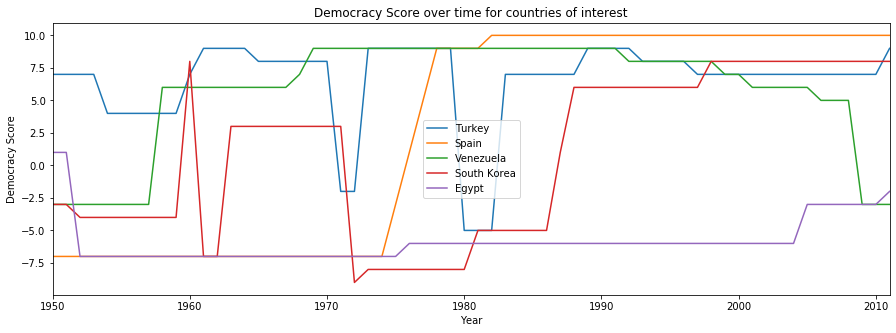

In [580]:
# PLotting democracy score 
df_DS.plot(figsize=(15,5));
plt.legend();
plt.xlabel('Year');
plt.ylabel('Democracy Score');
plt.title('Democracy Score over time for countries of interest');

This plot shows the democracy score of the countries of interest from 1950-2011

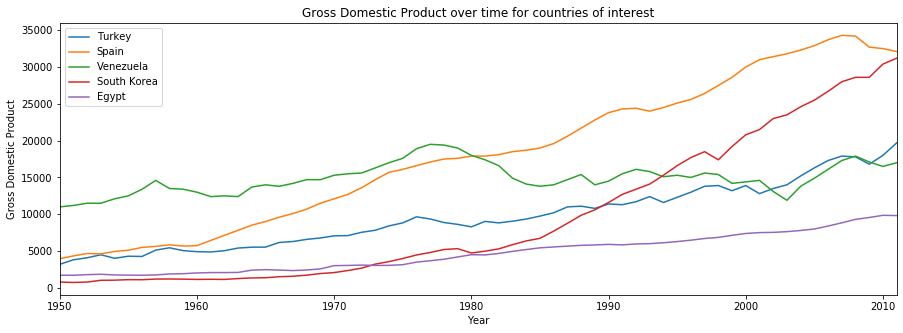

In [581]:
# PLotting GDP
df_GDP.plot(figsize=(15,5));
plt.legend();
plt.xlabel('Year');
plt.ylabel('Gross Domestic Product');
plt.title('Gross Domestic Product over time for countries of interest');

This plot shows the GDP of the countries of interest from 1950-2011

Only Venezuela does not seem to increase GDP consistently over time. The 2008 crisis is notable in the data of spain.

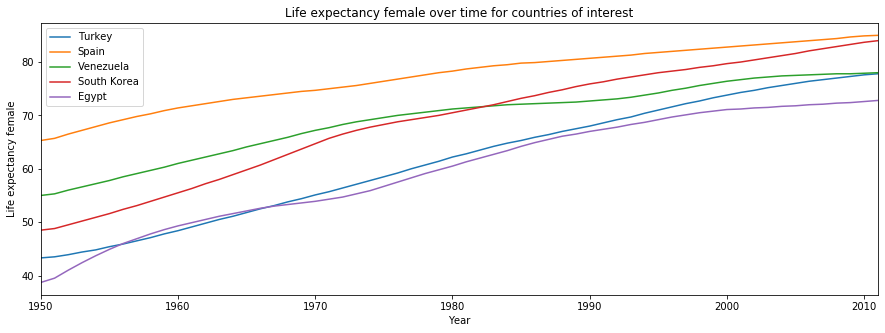

In [582]:
# PLotting LEF
df_LEF.plot(figsize=(15,5));
plt.legend();
plt.xlabel('Year');
plt.ylabel('Life expectancy female');
plt.title('Life expectancy female over time for countries of interest');

This plot shows the female life expextancy of the countries of interest from 1950-2011

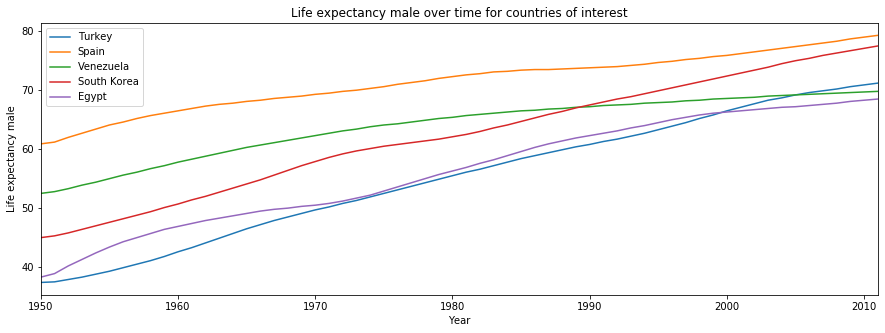

In [583]:
# PLotting LEF
df_LEM.plot(figsize=(15,5));
plt.legend();
plt.xlabel('Year');
plt.ylabel('Life expectancy male');
plt.title('Life expectancy male over time for countries of interest');

This plot shows the male life expextancy of the countries of interest from 1950-2011

In [584]:
#Renaming columns (countries) of dataframes to unique names as prepararion for merge
df_DS.rename(columns=lambda x: x[:10] + "DS", inplace=True)
df_GDP.rename(columns=lambda x: x[:10] + "GDP", inplace=True)
df_LEF.rename(columns=lambda x: x[:10] + "LEF", inplace=True)
df_LEM.rename(columns=lambda x: x[:10] + "LEM", inplace=True)


In [585]:
# merge datasets
df_combined = df_DS.merge(df_GDP, left_on='Year', right_on='Year', how='inner')
df_combined = df_combined.merge(df_LEF, left_on='Year', right_on='Year', how='inner')
df_combined = df_combined.merge(df_LEM, left_on='Year', right_on='Year', how='inner')

In [586]:
df_combined

year,TurkeyDS,SpainDS,VenezuelaDS,South KoreDS,EgyptDS,TurkeyGDP,SpainGDP,VenezuelaGDP,South KoreGDP,EgyptGDP,TurkeyLEF,SpainLEF,VenezuelaLEF,South KoreLEF,EgyptLEF,TurkeyLEM,SpainLEM,VenezuelaLEM,South KoreLEM,EgyptLEM
Year,,,,,,,,,,,,,,,,,,,,
1950,7.0,-7.0,-3.0,-3.0,1.0,3200,3960,11000,793,1720,43.3,65.3,55.0,48.5,38.7,37.3,60.8,52.4,44.9,38.2
1951,7.0,-7.0,-3.0,-3.0,1.0,3820,4340,11200,740,1720,43.5,65.7,55.3,48.8,39.5,37.4,61.1,52.7,45.2,38.8
1952,7.0,-7.0,-3.0,-4.0,-7.0,4090,4670,11500,794,1800,43.9,66.5,56.0,49.5,41.0,37.8,61.9,53.2,45.7,40.1
1953,7.0,-7.0,-3.0,-4.0,-7.0,4500,4620,11500,1030,1850,44.4,67.2,56.6,50.2,42.4,38.2,62.6,53.8,46.3,41.2
1954,4.0,-7.0,-3.0,-4.0,-7.0,4020,4950,12100,1050,1760,44.8,67.9,57.2,50.9,43.7,38.7,63.3,54.3,46.9,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,7.0,10.0,5.0,8.0,-3.0,17900,34300,17300,28000,8840,76.7,84.2,77.7,82.5,72.1,69.8,77.9,69.3,75.8,67.5
2008,7.0,10.0,5.0,8.0,-3.0,17800,34200,17900,28600,9310,77.0,84.4,77.8,82.9,72.3,70.1,78.2,69.4,76.2,67.7
2009,7.0,10.0,-3.0,8.0,-3.0,16800,32700,17100,28600,9560,77.3,84.7,77.8,83.3,72.4,70.5,78.6,69.5,76.6,68.0


In [587]:
# Creating a dataset with all four indicators for one country
df_spain = df_combined[['SpainDS', 'SpainGDP', 'SpainLEF', 'SpainLEM']]

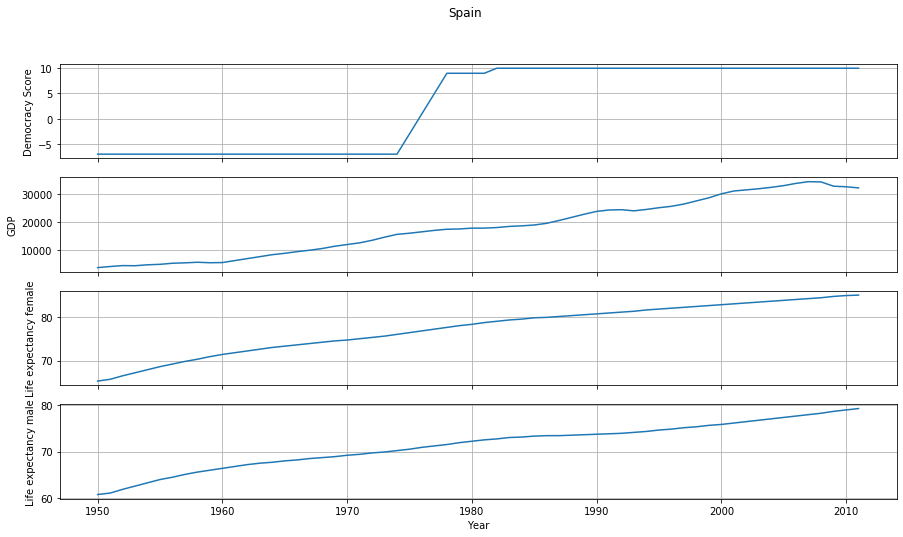

In [588]:
# PLotting the four indicators of a country over the same time axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15,8))
fig.suptitle('Spain')
ax1.plot(df_spain.SpainDS)
ax1.set_ylabel('Democracy Score')
ax1.grid()
ax2.plot(df_spain.SpainGDP)
ax2.set_ylabel('GDP')
ax2.grid()
ax3.plot(df_spain.SpainLEF)
ax3.set_ylabel('Life expectancy female')
ax3.grid()
ax4.plot(df_spain.SpainLEM)
ax4.set_ylabel('Life expectancy male')
ax4.grid()
plt.xlabel('Year');

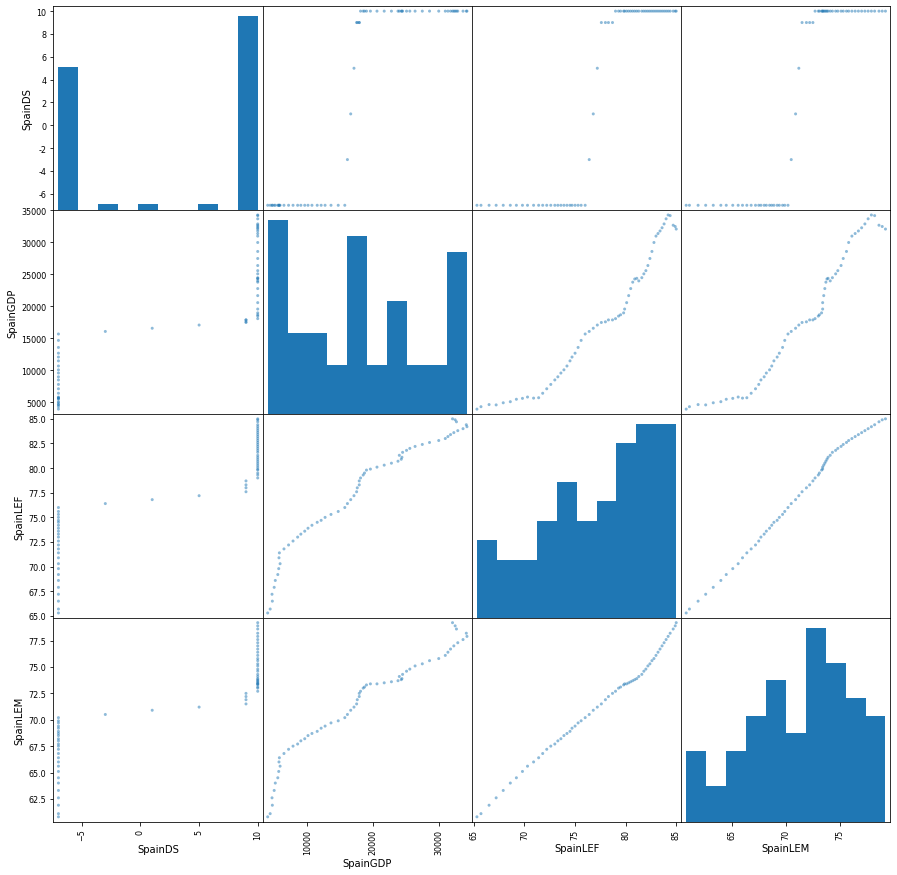

In [589]:
# Scatter plot for detection of correlations of different indicators
pd.plotting.scatter_matrix(df_spain, figsize=(15,15));

The scatter plot of democracy score correlation to GDP of spain might let the reader think that there is a correlation, as years of higher democracy scores have higher GDP. As seen in the plot of GDP of almost all countries this is more a correlation between year and GDP, as for spain there is a more or less steady increase in GDP over time. The end of the fascist Franco era is not visible in the data of GDP.

In [590]:
# Creating a dataset with all four indicators for one country
df_venezuela = df_combined[['VenezuelaDS', 'VenezuelaGDP', 'VenezuelaLEF', 'VenezuelaLEM']]

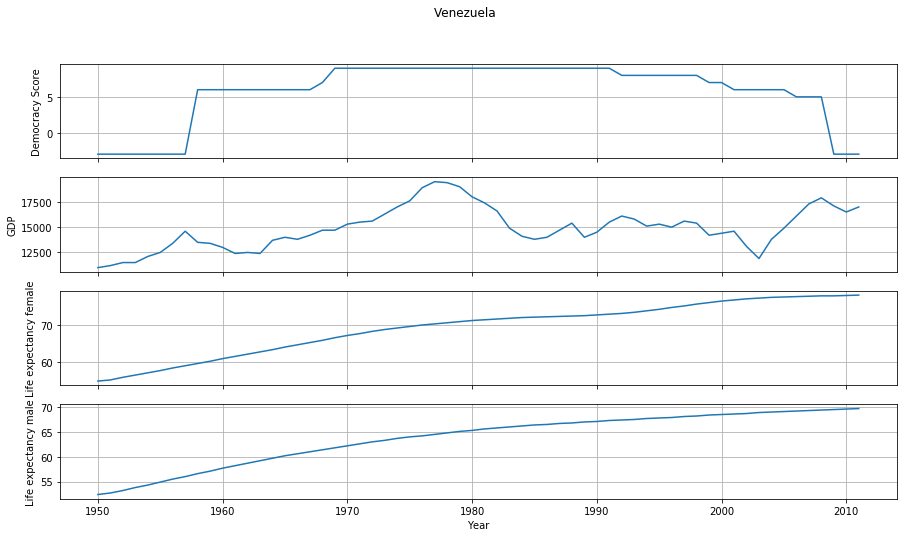

In [591]:
# PLotting the four indicators of a country over the same time axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15,8))
fig.suptitle('Venezuela')
ax1.plot(df_venezuela.VenezuelaDS)
ax1.set_ylabel('Democracy Score')
ax1.grid()
ax2.plot(df_venezuela.VenezuelaGDP)
ax2.set_ylabel('GDP')
ax2.grid()
ax3.plot(df_venezuela.VenezuelaLEF)
ax3.set_ylabel('Life expectancy female')
ax3.grid()
ax4.plot(df_venezuela.VenezuelaLEM)
ax4.set_ylabel('Life expectancy male')
ax4.grid()
plt.xlabel('Year');

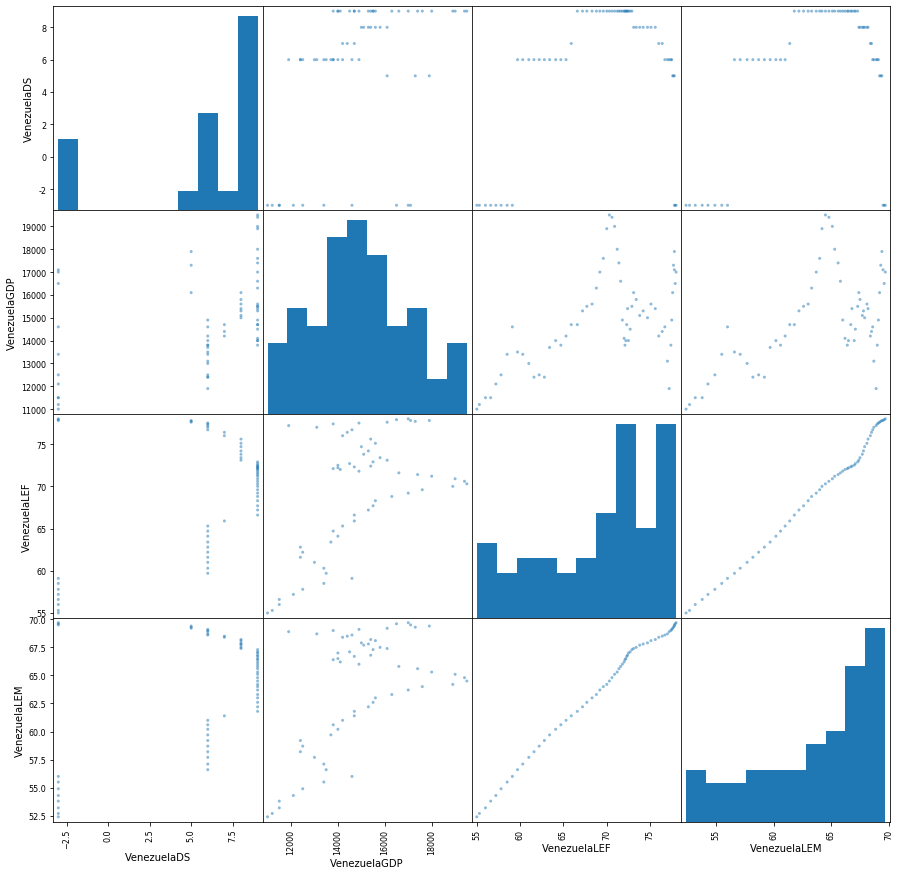

In [592]:
# Scatter plot for detection of correlations of different indicators
pd.plotting.scatter_matrix(df_venezuela, figsize=(15,15));

In the scatterplot of GDP to Democracy Score of Venezuela there is a slight correleation higher GDP to higher democracy score. The years with highest democracy score are the years of highest GDP. The years of highest GDP are around 1970 to 1980, therefore the in the case of Venezuela there is no steady grow of GDP over time. The data just shows a positive correlation between GDP and democracy score. It does not give a conclusion if democracy ifluences GDP or the other way round.

In [593]:
# Creating a dataset with all four indicators for one country
df_turkey = df_combined[['TurkeyDS', 'TurkeyGDP', 'TurkeyLEF', 'TurkeyLEM']]

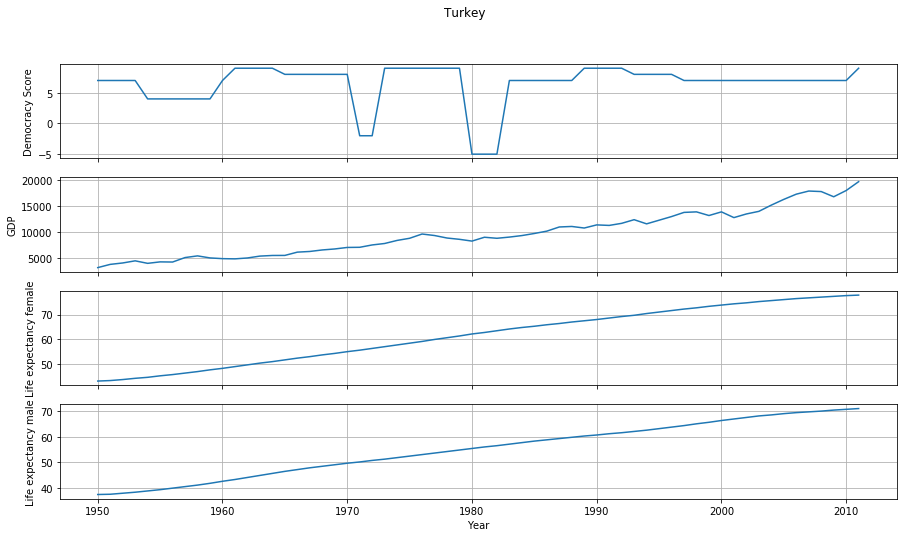

In [594]:
# PLotting the four indicators of a country over the same time axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15,8))
fig.suptitle('Turkey')
ax1.plot(df_turkey.TurkeyDS)
ax1.set_ylabel('Democracy Score')
ax1.grid()
ax2.plot(df_turkey.TurkeyGDP)
ax2.set_ylabel('GDP')
ax2.grid()
ax3.plot(df_turkey.TurkeyLEF)
ax3.set_ylabel('Life expectancy female')
ax3.grid()
ax4.plot(df_turkey.TurkeyLEM)
ax4.set_ylabel('Life expectancy male')
ax4.grid()
plt.xlabel('Year');

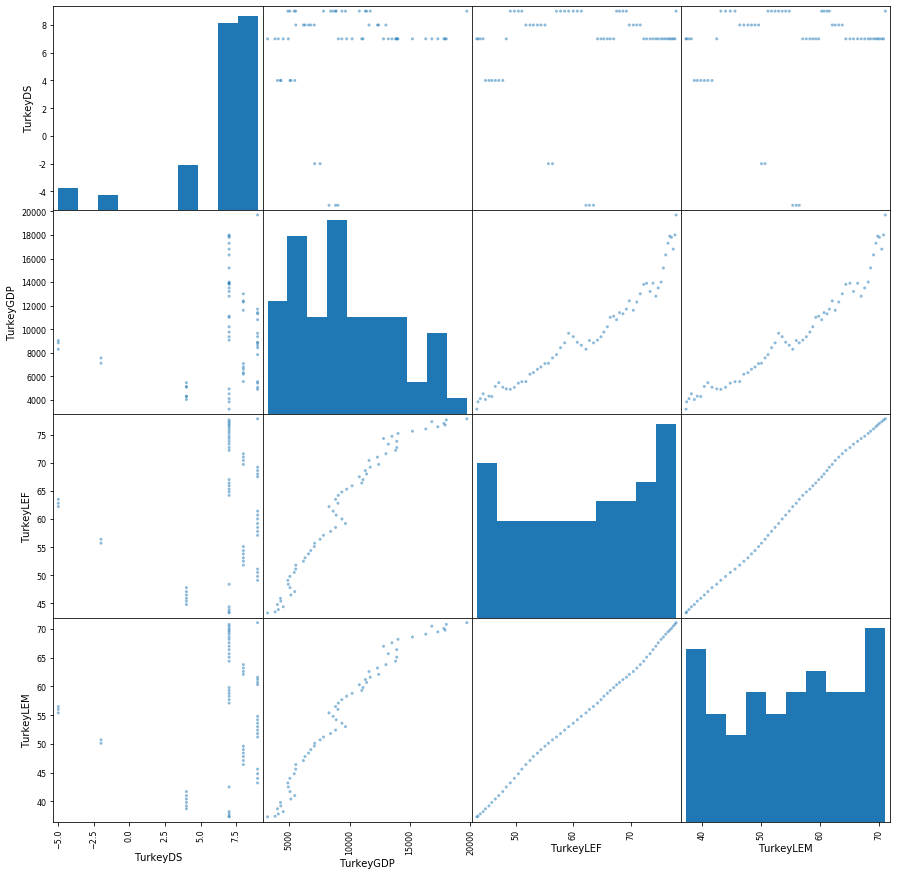

In [595]:
# Scatter plot for detection of correlations of different indicators
pd.plotting.scatter_matrix(df_turkey, figsize=(15,15));

In the case of turkey there is no correlation of GDP and democracy score visible.

In [596]:
# Creating a dataset with all four indicators for one country
df_egypt = df_combined[['EgyptDS', 'EgyptGDP', 'EgyptLEF', 'EgyptLEM']]

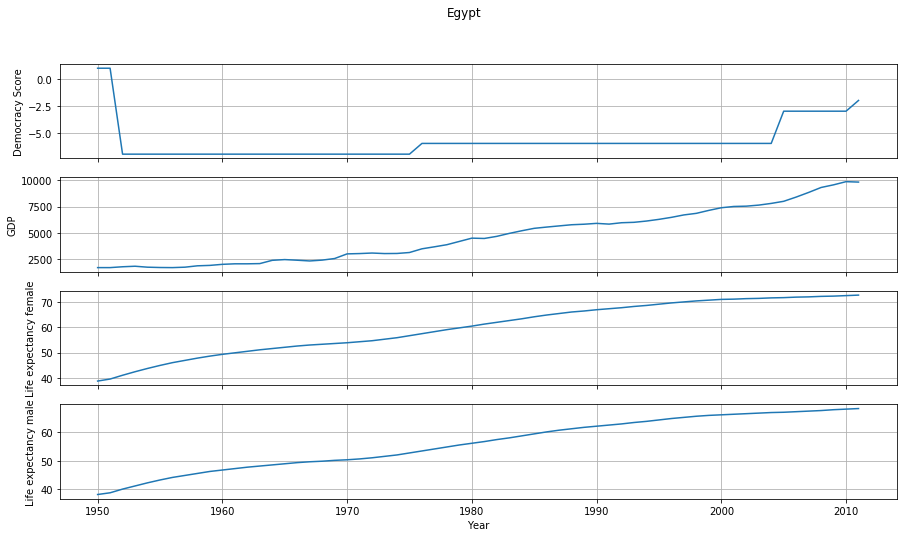

In [597]:
# PLotting the four indicators of a country over the same time axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15,8))
fig.suptitle('Egypt')
ax1.plot(df_egypt.EgyptDS)
ax1.set_ylabel('Democracy Score')
ax1.grid()
ax2.plot(df_egypt.EgyptGDP)
ax2.set_ylabel('GDP')
ax2.grid()
ax3.plot(df_egypt.EgyptLEF)
ax3.set_ylabel('Life expectancy female')
ax3.grid()
ax4.plot(df_egypt.EgyptLEM)
ax4.set_ylabel('Life expectancy male')
ax4.grid()
plt.xlabel('Year');

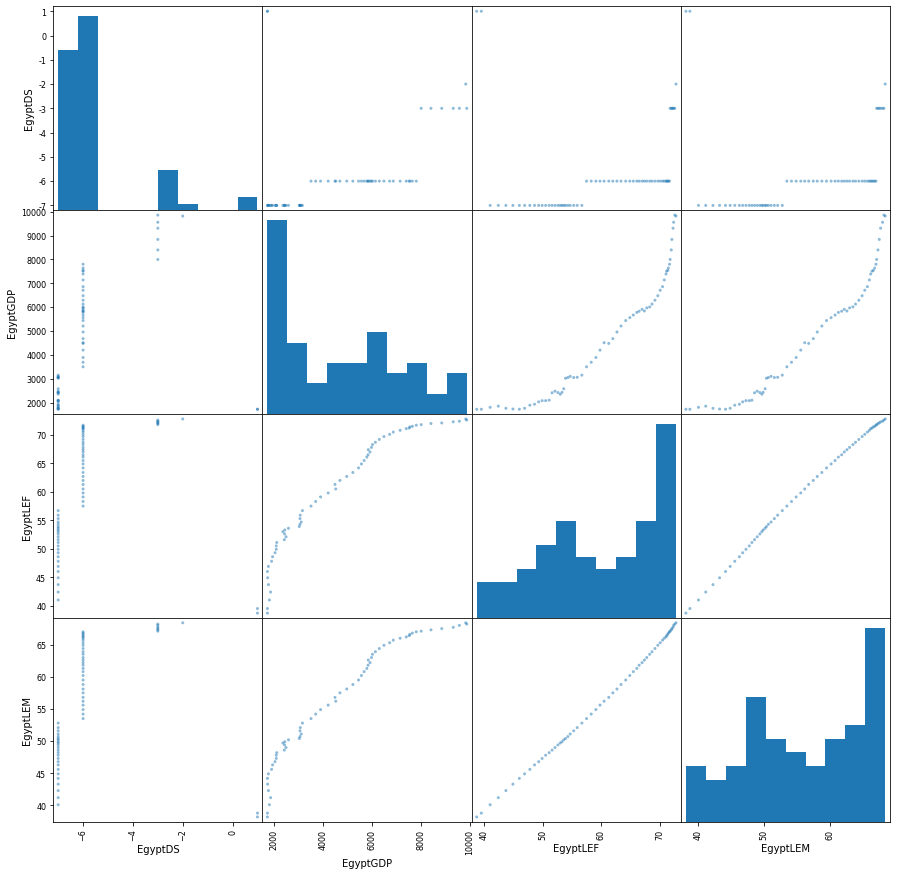

In [598]:
# Scatter plot for detection of correlations of different indicators
pd.plotting.scatter_matrix(df_egypt, figsize=(15,15));

The data of egypt indicates a positive correlation between democracy score and GDP, but it can't be proven as there is a steady growth in democracy score and GDP over all the data available. Further investigation should be done if there is a correlation between democracy score and growth rate in GDP.

In [599]:
# Creating a dataset with all four indicators for one country
df_scorea = df_combined[['South KoreDS', 'South KoreGDP', 'South KoreLEF', 'South KoreLEM']]

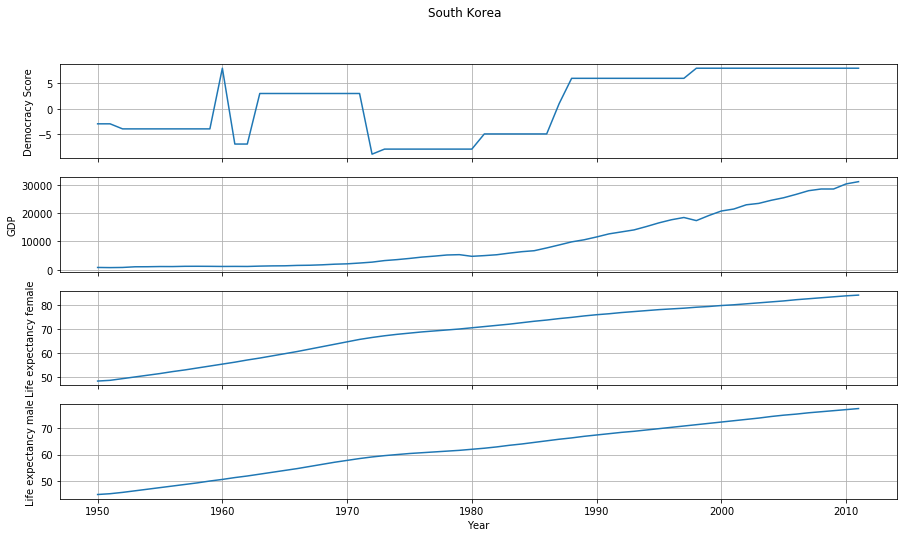

In [600]:
# PLotting the four indicators of a country over the same time axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15,8))
fig.suptitle('South Korea')
ax1.plot(df_scorea['South KoreDS'])
ax1.set_ylabel('Democracy Score')
ax1.grid()
ax2.plot(df_scorea['South KoreGDP'])
ax2.set_ylabel('GDP')
ax2.grid()
ax3.plot(df_scorea['South KoreLEF'])
ax3.set_ylabel('Life expectancy female')
ax3.grid()
ax4.plot(df_scorea['South KoreLEM'])
ax4.set_ylabel('Life expectancy male')
ax4.grid()
plt.xlabel('Year');

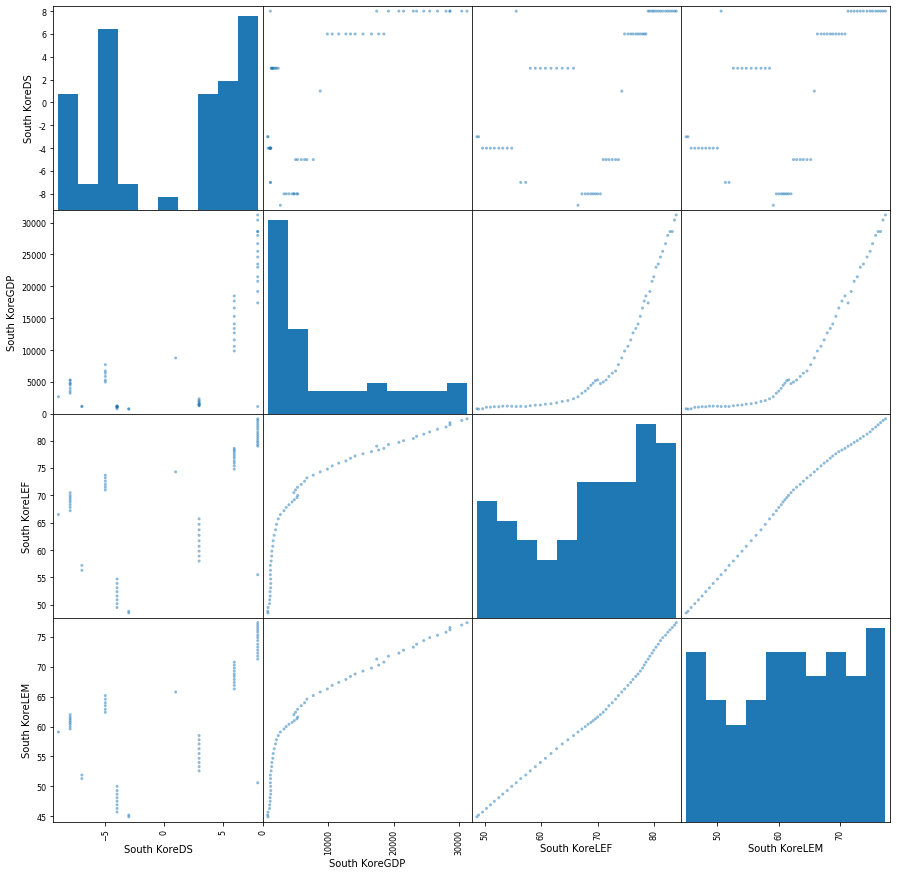

In [601]:
# Scatter plot for detection of correlations of different indicators
pd.plotting.scatter_matrix(df_scorea, figsize=(15,15));

The data of South Korea shows a positive correlation between democracy score and GDP. Furthermore it seems as if the growth in GDP accelerates further, the higher the democracy score is. But there are more factors then just democracy, the end of the war in Korea and stability in the country.

<a id='conclusions'></a>
## Conclusions



**Results:**

1. Other than in Venezuela there is no correlation of democracy score and GDP visibile for the investigated data. In the case of Venezuela it seems that a drop in GDP follows a drop in democracy score, this could be a sign of causation. Still, the data does not proove clear correlation in democracy score, GDP or life expectancy. Hence there is no clear sign for causation in any of these indicators. Maybe instead of the absolut GDP the GDP growth rate shows some correlation to democracy score. Further investiagation could be done on that.
2. Furthermore in none of the investigated countries there is a clear difference in growth of life expecatancy male and female. It seems like the female life expectancy in spain did not continue its growth with the same rate as the male life expectancy after the 2008 financial crisis and in Venezuela after the drop of GDP in the 1980s it seems that female life expectancy does not grow with the same rate as male. Generally in all considered data the mean life expectancy of women is higher than of men.


**Limitations**
1. Only a small amount of countries was investigated. There is data for more countries available to check for correlation in the four indicators.
2. Democracy Score seems to be a problematic indicator as it is not 100% objectively and measureable but more a evaluation of different indicators.
